In [1]:
import gym

In [2]:
# Filter tensorflow version warnings
import os
# https://stackoverflow.com/questions/40426502/is-there-a-way-to-suppress-the-messages-tensorflow-prints/40426709
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
# https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

In [3]:
from gym.envs.box2d import CarRacing
from stable_baselines.common.vec_env import DummyVecEnv

In [4]:
#std env from Mike
if __name__=='__main__':
    env0 = lambda :  CarRacing(
        grayscale=2,   #1   2 es green, modif propia
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=6,
        num_lanes=1,
        num_tracks=1,
        )
    
    #env = getattr(environments, env)
    env0 = DummyVecEnv([env0])

    obs = env0.reset()

Track generation: 1127..1413 -> 286-tiles track


In [5]:
print(env0.action_space)
print(env0.observation_space)
print(obs.shape)

Discrete(5)
Box(96, 96, 6)
(1, 96, 96, 6)


In [6]:
try:
    print(env0.action_space.high)
    print(env0.action_space.low)
except:
    print('discrete')
    print(env0.action_space.sample(),env0.action_space.sample(),env0.action_space.sample())    

discrete
4 0 3


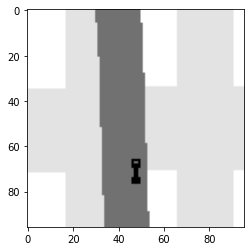

In [7]:
from matplotlib import pyplot as plt
plt.imshow(obs[0,:,:,0], cmap='gray')

In [8]:
env0.close()

In [9]:
from stable_baselines.common.policies import MlpPolicy, CnnPolicy, CnnLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common import make_vec_env
from stable_baselines import PPO2 #, PPO1


In [10]:
#training env
if __name__=='__main__':
    env1 = lambda :  CarRacing(
        grayscale=2,
        show_info_panel=0,
        discretize_actions="hard",
        frames_per_state=6,
        num_lanes=1,
        num_tracks=1,
        max_time_out=1.0,
        max_step_reward=1,
        allow_outside=True,
        )


In [11]:
# multiprocess environment
paralelo=1

if paralelo==1:
    env1 = DummyVecEnv([env1])
    #env1 = gym.make(env1)
else:
    env1 = make_vec_env(env1, n_envs=paralelo)

obs = env1.reset()
print(obs.shape)

Track generation: 1123..1415 -> 292-tiles track
(1, 96, 96, 6)


In [12]:
batch=128
updates=512
cont=False

if not cont:
    model = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)

model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 982..1239 -> 257-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1141..1430 -> 289-tiles track
-------------------------------------
| approxkl           | 0.00829638   |
| clipfrac           | 0.1640625    |
| explained_variance | 0.000183     |
| fps                | 9            |
| n_updates          | 1            |
| policy_entropy     | 1.6016612    |
| policy_loss        | -0.019470952 |
| serial_timesteps   | 128          |
| time_elapsed       | 1.84e-05     |
| total_timesteps    | 128          |
| value_loss         | 1630.4514    |
-------------------------------------
--------------------------------------
| approxkl           | 0.0048748907  |
| clipfrac           | 0.0390625     |
| explained_variance | -0.317        

done by time
Track generation: 1252..1569 -> 317-tiles track
-------------------------------------
| approxkl           | 0.007076179  |
| clipfrac           | 0.0859375    |
| explained_variance | -0.00515     |
| fps                | 10           |
| n_updates          | 11           |
| policy_entropy     | 1.028004     |
| policy_loss        | -0.006225654 |
| serial_timesteps   | 1408         |
| time_elapsed       | 107          |
| total_timesteps    | 1408         |
| value_loss         | 1461.06      |
-------------------------------------
done by time
Track generation: 1097..1375 -> 278-tiles track
done by time
Track generation: 1067..1343 -> 276-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1150..1442 -> 292-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
-------------------------------------
| approxkl           | 0.0065815086 |
| clipfrac           | 0.078125     |
| explained_variance | -0.

done by time
Track generation: 1322..1657 -> 335-tiles track
done by time
Track generation: 1048..1312 -> 264-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1273..1595 -> 322-tiles track
done by time
Track generation: 1051..1321 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
-------------------------------------
| approxkl           | 0.0072206957 |
| clipfrac           | 0.083984375  |
| explained_variance | -0.00626     |
| fps                | 11           |
| n_updates          | 22           |
| policy_entropy     | 0.7065897    |
| policy_loss        | -0.004899117 |
| serial_timesteps   | 2816         |
| time_elapsed       | 229          |
| total_timesteps    | 2816         |
| value_loss         | 1163.2096    |

done by time
Track generation: 1369..1715 -> 346-tiles track
done by time
Track generation: 1091..1371 -> 280-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 988..1243 -> 255-tiles track
done by time
Track generation: 1248..1563 -> 315-tiles track
done by time
Track generation: 1089..1374 -> 285-tiles track
done by time
Track generation: 1031..1299 -> 268-tiles track
--------------------------------------
| approxkl           | 0.00040597073 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.0315        |
| fps                | 11            |
| n_updates          | 32            |
| policy_entropy     | 0.44088978    |
| policy_loss        | 0.0005158957  |
| serial_timesteps   | 4096          |
| time_elapsed       | 341           |
| total_timesteps    | 4096          |
| value_loss         | 951.2812      |
--------------------------------------
done by time
Track generation: 1219..1528 -> 309-tiles track
done by 

done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1027..1288 -> 261-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
--------------------------------------
| approxkl           | 0.0042441986  |
| clipfrac           | 0.03515625    |
| explained_variance | 0.00173       |
| fps                | 12            |
| n_updates          | 42            |
| policy_entropy     | 0.8229503     |
| policy_loss        | -0.0029478017 |
| serial_timesteps   | 5376          |
| time_elapsed       | 451           |
| total_timesteps    | 5376          |
| value_loss         | 951.58026     |
--------------------------------------
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1248..1573 -> 325-tiles track
done by time
Track generation: 1137..1425 -> 288-tiles track
done 

done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
---------------------------------------
| approxkl           | 0.0023331377   |
| clipfrac           | 0.033203125    |
| explained_variance | 0.0373         |
| fps                | 15             |
| n_updates          | 52             |
| policy_entropy     | 0.7043087      |
| policy_loss        | -0.00035387604 |
| serial_timesteps   | 6656           |
| time_elapsed       | 561            |
| total_timesteps    | 6656           |
| value_loss         | 446.4911       |
---------------------------------------
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1080..1354 -> 274-tile

done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1031..1298 -> 267-tiles track
done by time
Track generation: 1253..1601 -> 348-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1173..1470 -> 297-tiles track
--------------------------------------
| approxkl           | 0.0044438816  |
| clipfrac           | 0.0546875     |
| explained_variance | -0.0553       |
| fps                | 12            |
| n_updates          | 62            |
| policy_entropy     | 1.0179744     |
| policy_loss        | -0.0023242782 |
| serial_timesteps   | 7936          |
| time_elapsed       | 668           |
| total_timesteps    | 7936          |
| value_loss         | 668.6343      |
--------------------------------------
done by time
Track generation: 1255..1573 -> 318-tiles track
done by

done by time
Track generation: 1035..1305 -> 270-tiles track
done by time
Track generation: 1157..1451 -> 294-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 980..1229 -> 249-tiles track
done by time
Track generation: 1149..1443 -> 294-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1086..1367 -> 281-tiles track
-------------------------------------
| approxkl           | 0.01105022   |
| clipfrac           | 0.21484375   |
| explained_variance | 0.0298       |
| fps                | 12           |
| n_updates          | 72           |
| policy_entropy     | 1.0955573    |
| policy_loss        | -0.010018028 |
| serial_timesteps   | 9216         |
| time_elapsed       | 775          |
| total_timesteps    | 9216         |
| value_loss         | 375.83557    |
-------------------------------------
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track ge

done by time
Track generation: 1195..1498 -> 303-tiles track
-------------------------------------
| approxkl           | 0.01586465   |
| clipfrac           | 0.296875     |
| explained_variance | -0.0207      |
| fps                | 10           |
| n_updates          | 83           |
| policy_entropy     | 0.9759185    |
| policy_loss        | -0.010550791 |
| serial_timesteps   | 10624        |
| time_elapsed       | 867          |
| total_timesteps    | 10624        |
| value_loss         | 516.47723    |
-------------------------------------
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1197..1500 -> 303-tiles track
--------------------------------------
| approxkl           | 0.008012654   |
| clipfrac           | 0.13867188    |
| explained_variance | 0.208         |
| fps                | 16            |
| n_updates          | 84            |
| policy_entropy     | 1.0603954     |
| policy_loss        | 0.00071160845 |
| serial_ti

done by time
Track generation: 1194..1497 -> 303-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
-------------------------------------
| approxkl           | 0.0056931246 |
| clipfrac           | 0.0703125    |
| explained_variance | 0.0136       |
| fps                | 13           |
| n_updates          | 94           |
| policy_entropy     | 0.92201996   |
| policy_loss        | 0.005933173  |
| serial_timesteps   | 12032        |
| time_elapsed       | 980          |
| total_timesteps    | 12032        |
| value_loss         | 255.2116     |
-------------------------------------
done by time
Track generation: 1056..1324 -> 268-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track

done by time
Track generation: 1209..1516 -> 307-tiles track
done by time
Track generation: 979..1228 -> 249-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
-------------------------------------
| approxkl           | 0.0051597077 |
| clipfrac           | 0.080078125  |
| explained_variance | 0.205        |
| fps                | 12           |
| n_updates          | 104          |
| policy_entropy     | 0.7300743    |
| policy_loss        | 0.003629666  |
| serial_timesteps   | 13312        |
| time_elapsed       | 1.08e+03     |
| total_timesteps    | 13312        |
| value_loss         | 230.93268    |
-------------------------------------
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1044..1313 -> 269-tiles track
done by time
Track generation: 883..1112 -> 229-tiles track
--------------------

done by time
Track generation: 945..1191 -> 246-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1096..1379 -> 283-tiles track
done by time
Track generation: 1178..1477 -> 299-tiles track
done by time
Track generation: 1165..1459 -> 294-tiles track
-------------------------------------
| approxkl           | 0.0003278173 |
| clipfrac           | 0.0          |
| explained_variance | 0.294        |
| fps                | 12           |
| n_updates          | 114          |
| policy_entropy     | 0.77229244   |
| policy_loss        | -0.001148906 |
| serial_timesteps   | 14592        |
| time_elapsed       | 1.19e+03     |
| total_timesteps    | 14592        |
| value_loss         | 136.22104    |
-------------------------------------
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track 

done by time
Track generation: 1105..1385 -> 280-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 941..1182 -> 241-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1168..1465 -> 297-tiles track
done by time
Track generation: 1139..1432 -> 293-tiles track
--------------------------------------
| approxkl           | 0.007671317   |
| clipfrac           | 0.109375      |
| explained_variance | 0.123         |
| fps                | 11            |
| n_updates          | 124           |
| policy_entropy     | 0.63100004    |
| policy_loss        | -0.0029199175 |
| serial_timesteps   | 15872         |
| time_elapsed       | 1.3e+03       |
| total_timesteps    | 15872         |
| value_loss         | 49.614567     |
--------------------------------------
done by time
Track generation: 971..1223 -> 252-tiles track
done by t

done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 1312..1644 -> 332-tiles track
done by time
Track generation: 1159..1452 -> 293-tiles track
done by time
Track generation: 1110..1392 -> 282-tiles track
-------------------------------------
| approxkl           | 0.012714057  |
| clipfrac           | 0.18945312   |
| explained_variance | -0.104       |
| fps                | 11           |
| n_updates          | 134          |
| policy_entropy     | 0.8479913    |
| policy_loss        | -0.015489079 |
| serial_timesteps   | 17152        |
| time_elapsed       | 1.4e+03      |
| total_timesteps    | 17152        |
| value_loss         | 44.703617    |
-------------------------------------
done by time
Track generation: 1004..1267 -> 263-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track

done by time
Track generation: 1066..1341 -> 275-tiles track
done by time
Track generation: 1142..1440 -> 298-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 991..1243 -> 252-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
-------------------------------------
| approxkl           | 0.0058067073 |
| clipfrac           | 0.072265625  |
| explained_variance | 0.00225      |
| fps                | 11           |
| n_updates          | 144          |
| policy_entropy     | 0.95658916   |
| policy_loss        | -0.011391649 |
| serial_timesteps   | 18432        |
| time_elapsed       | 1.51e+03     |
| total_timesteps    | 18432        |
| value_loss         | 48.19898     |
-------------------------------------
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1125..1410 -> 285-tiles track
done by time
Track generation: 1208..1514 -> 306-tiles track
done by time
Track 

-------------------------------------
| approxkl           | 0.0062417216 |
| clipfrac           | 0.13671875   |
| explained_variance | -0.0605      |
| fps                | 11           |
| n_updates          | 153          |
| policy_entropy     | 0.90394616   |
| policy_loss        | -0.008180419 |
| serial_timesteps   | 19584        |
| time_elapsed       | 1.61e+03     |
| total_timesteps    | 19584        |
| value_loss         | 46.694454    |
-------------------------------------
done by time
Track generation: 1155..1447 -> 292-tiles track
done by time
Track generation: 900..1137 -> 237-tiles track
done by time
Track generation: 1112..1399 -> 287-tiles track
done by time
Track generation: 1035..1307 -> 272-tiles track
done by time
Track generation: 1319..1653 -> 334-tiles track
-------------------------------------
| approxkl           | 0.014597554  |
| clipfrac           | 0.22851562   |
| explained_variance | 0.038        |
| fps                | 11           |
| n_updates 

done by time
Track generation: 1067..1339 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1098..1376 -> 278-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1300..1629 -> 329-tiles track
done by time
Track generation: 1094..1372 -> 278-tiles track
--------------------------------------
| approxkl           | 0.015979752   |
| clipfrac           | 0.17382812    |
| explained_variance | -0.0549       |
| fps                | 10            |
| n_updates          | 163           |
| policy_entropy     | 0.71617174    |
| policy_loss        | -0.0118980985 |
| serial_timesteps   | 20864         |
| time_elapsed       | 1.72e+03      |
| total_timesteps    | 20864         |
| value_loss         | 38.159584     |
--------------------------------------
done by time
Track generation: 1083..1358 -> 275-tiles track
done by

done by time
Track generation: 1110..1399 -> 289-tiles track
done by time
Track generation: 1193..1503 -> 310-tiles track
--------------------------------------
| approxkl           | 0.0004224457  |
| clipfrac           | 0.0           |
| explained_variance | 0.0164        |
| fps                | 10            |
| n_updates          | 173           |
| policy_entropy     | 0.315578      |
| policy_loss        | -0.0018155028 |
| serial_timesteps   | 22144         |
| time_elapsed       | 1.82e+03      |
| total_timesteps    | 22144         |
| value_loss         | 37.334286     |
--------------------------------------
done by time
Track generation: 1300..1629 -> 329-tiles track
done by time
Track generation: 1110..1394 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1184..1485 -> 301-tiles track
done by

done by time
Track generation: 1162..1457 -> 295-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1168..1463 -> 295-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
-------------------------------------
| approxkl           | 0.001957246  |
| clipfrac           | 0.0234375    |
| explained_variance | 0.166        |
| fps                | 11           |
| n_updates          | 183          |
| policy_entropy     | 0.55638576   |
| policy_loss        | -0.001239994 |
| serial_timesteps   | 23424        |
| time_elapsed       | 1.93e+03     |
| total_timesteps    | 23424        |
| value_loss         | 32.652245    |
-------------------------------------
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1379..1728 -> 349-tiles track
done by time
Track

done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1122..1411 -> 289-tiles track
--------------------------------------
| approxkl           | 0.00058112247 |
| clipfrac           | 0.0078125     |
| explained_variance | -0.00606      |
| fps                | 10            |
| n_updates          | 192           |
| policy_entropy     | 0.48668346    |
| policy_loss        | 0.00088723295 |
| serial_timesteps   | 24576         |
| time_elapsed       | 2.03e+03      |
| total_timesteps    | 24576         |
| value_loss         | 45.746914     |
--------------------------------------
done by time
Track generation: 1171..1476 -> 305-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1135..1430 -> 295-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
-------------------------------------
| approxkl           | 0.001

done by time
Track generation: 1190..1492 -> 302-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1072..1344 -> 272-tiles track
done by time
Track generation: 1120..1410 -> 290-tiles track
---------------------------------------
| approxkl           | 0.015576968    |
| clipfrac           | 0.30078125     |
| explained_variance | -0.0475        |
| fps                | 11             |
| n_updates          | 202            |
| policy_entropy     | 0.8382035      |
| policy_loss        | -0.00038249185 |
| serial_timesteps   | 25856          |
| time_elapsed       | 2.14e+03       |
| total_timesteps    | 25856          |
| value_loss         | 72.083855      |
---------------------------------------
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1108..1389 -> 281-tile

done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1331..1668 -> 337-tiles track
done by time
Track generation: 1089..1365 -> 276-tiles track
done by time
Track generation: 969..1219 -> 250-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1139..1438 -> 299-tiles track
------------------------------------
| approxkl           | 0.004967767 |
| clipfrac           | 0.09765625  |
| explained_variance | -0.0074     |
| fps                | 10          |
| n_updates          | 212         |
| policy_entropy     | 0.8815669   |
| policy_loss        | 0.005057904 |
| serial_timesteps   | 27136       |
| time_elapsed       | 2.25e+03    |
| total_timesteps    | 27136       |
| value_loss         | 58.957302   |
------------------------------------
done by time
Track generation: 120

------------------------------------
| approxkl           | 0.1665501   |
| clipfrac           | 0.15429688  |
| explained_variance | 0.224       |
| fps                | 31          |
| n_updates          | 223         |
| policy_entropy     | 0.6454255   |
| policy_loss        | 0.026116181 |
| serial_timesteps   | 28544       |
| time_elapsed       | 2.37e+03    |
| total_timesteps    | 28544       |
| value_loss         | 45.774395   |
------------------------------------
done by time
Track generation: 1169..1474 -> 305-tiles track
done by time
Track generation: 1136..1433 -> 297-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1255..1574 -> 319-tiles track
----------------------------------
| approxkl           | 2.1664484 |
| clipfrac           | 0.9375    |
| explained_variance | 0.0961    |
| fps                | 12        |
| n_updates          | 224       |
| policy_entropy     | 0.2742635 |
| policy_loss        | 0.19299

done by time
Track generation: 1149..1440 -> 291-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1012..1276 -> 264-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 969..1225 -> 256-tiles track
--------------------------------------
| approxkl           | 2.6615002e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.0865        |
| fps                | 11            |
| n_updates          | 233           |
| policy_entropy     | 0.067099564   |
| policy_loss        | 0.00025035022 |
| serial_timesteps   | 29824         |
| time_elapsed       | 2.47e+03      |
| total_timesteps    | 29824         |
| value_loss         | 62.79194      |
--------------------------------------
done by time
Track generation: 1111..1396 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1111..1393 -> 282-tiles track
done by 

done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1001..1257 -> 256-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1179..1484 -> 305-tiles track
done by time
Track generation: 962..1213 -> 251-tiles track
--------------------------------------
| approxkl           | 1.1532585e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.0044       |
| fps                | 10            |
| n_updates          | 243           |
| policy_entropy     | 0.035062402   |
| policy_loss        | 1.2576347e-06 |
| serial_timesteps   | 31104         |
| time_elapsed       | 2.58e+03      |
| total_timesteps    | 31104         |
| value_loss         | 60.56207      |
--------------------------------------
done by 

done by time
Track generation: 1058..1331 -> 273-tiles track
done by time
Track generation: 999..1260 -> 261-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1047..1317 -> 270-tiles track
done by time
Track generation: 1170..1469 -> 299-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1056..1324 -> 268-tiles track
---------------------------------------
| approxkl           | 5.17263e-05    |
| clipfrac           | 0.0            |
| explained_variance | 0.257          |
| fps                | 11             |
| n_updates          | 253            |
| policy_entropy     | 0.06366063     |
| policy_loss        | -0.00022511277 |
| serial_timesteps   | 32384          |
| time_elapsed       | 2.69e+03       |
| total_timesteps    | 32384          |
| value_loss         | 56.106606      |
---------------------------------------
done by time
Track generation: 1168..1464 -> 296-tiles t

done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 948..1194 -> 246-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
---------------------------------------
| approxkl           | 1.0574091e-06  |
| clipfrac           | 0.0            |
| explained_variance | -0.0164        |
| fps                | 12             |
| n_updates          | 262            |
| policy_entropy     | 0.069468245    |
| policy_loss        | -3.6235433e-06 |
| serial_timesteps   | 33536          |
| time_elapsed       | 2.79e+03       |
| total_timesteps    | 33536          |
| value_loss         | 52.792492      |
---------------------------------------
done by time
Track generation: 1057..1332 -> 275-tiles track
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 1283..1607 -> 324-tiles

done by time
Track generation: 1157..1459 -> 302-tiles track
done by time
Track generation: 1209..1521 -> 312-tiles track
done by time
Track generation: 1030..1296 -> 266-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1059..1332 -> 273-tiles track
--------------------------------------
| approxkl           | 0.00024216532 |
| clipfrac           | 0.00390625    |
| explained_variance | -0.0483       |
| fps                | 12            |
| n_updates          | 272           |
| policy_entropy     | 0.123197794   |
| policy_loss        | -0.0012424936 |
| serial_timesteps   | 34816         |
| time_elapsed       | 2.9e+03       |
| total_timesteps    | 34816         |
| value_loss         | 53.65259      |
--------------------------------------
done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1042..1313 -> 271-tiles track
done by time
Track generation: 1233..1545 -> 312-tiles track
done 

--------------------------------------
| approxkl           | 5.2541414e-05 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.0113        |
| fps                | 10            |
| n_updates          | 281           |
| policy_entropy     | 0.1089045     |
| policy_loss        | -0.0006728907 |
| serial_timesteps   | 35968         |
| time_elapsed       | 3e+03         |
| total_timesteps    | 35968         |
| value_loss         | 50.009846     |
--------------------------------------
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1010..1270 -> 260-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1115..1404 -> 289-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
--------------------------------------
| approxkl           | 0.0007

done by time
Track generation: 1244..1559 -> 315-tiles track
--------------------------------------
| approxkl           | 0.00025308365 |
| clipfrac           | 0.0           |
| explained_variance | 0.137         |
| fps                | 11            |
| n_updates          | 290           |
| policy_entropy     | 0.22740267    |
| policy_loss        | -0.0010356521 |
| serial_timesteps   | 37120         |
| time_elapsed       | 3.1e+03       |
| total_timesteps    | 37120         |
| value_loss         | 46.742794     |
--------------------------------------
done by time
Track generation: 1238..1560 -> 322-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1045..1310 -> 265-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
--------------------------------------
| approxkl           | 0.00044276484 |
| clipfrac           | 0.005859375   |
| explaine

done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1089..1371 -> 282-tiles track
done by time
Track generation: 991..1243 -> 252-tiles track
--------------------------------------
| approxkl           | 0.00079823355 |
| clipfrac           | 0.009765625   |
| explained_variance | 0.0145        |
| fps                | 10            |
| n_updates          | 300           |
| policy_entropy     | 0.071933076   |
| policy_loss        | -0.0022227261 |
| serial_timesteps   | 38400         |
| time_elapsed       | 3.21e+03      |
| total_timesteps    | 38400         |
| value_loss         | 48.816254     |
--------------------------------------
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
------

done by time
Track generation: 1388..1739 -> 351-tiles track
done by time
Track generation: 1123..1418 -> 295-tiles track
done by time
Track generation: 1189..1490 -> 301-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1223..1532 -> 309-tiles track
--------------------------------------
| approxkl           | 2.9690682e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0561       |
| fps                | 11            |
| n_updates          | 310           |
| policy_entropy     | 0.036004037   |
| policy_loss        | 0.000140102   |
| serial_timesteps   | 39680         |
| time_elapsed       | 3.32e+03      |
| total_timesteps    | 39680         |
| value_loss         | 41.94857      |
--------------------------------------
done by time
Track generation: 980..1232 -> 252-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1202..1507 -> 305-tiles track
done by 

done by time
Track generation: 1025..1285 -> 260-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1311..1643 -> 332-tiles track
done by time
Track generation: 1168..1473 -> 305-tiles track
done by time
Track generation: 1165..1461 -> 296-tiles track
--------------------------------------
| approxkl           | 0.0008535113  |
| clipfrac           | 0.01171875    |
| explained_variance | 0.00768       |
| fps                | 12            |
| n_updates          | 320           |
| policy_entropy     | 0.081312545   |
| policy_loss        | -0.0018379871 |
| serial_timesteps   | 40960         |
| time_elapsed       | 3.43e+03      |
| total_timesteps    | 40960         |
| value_loss         | 37.548695     |
--------------------------------------
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done 

done by time
Track generation: 1102..1381 -> 279-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1278..1604 -> 326-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1138..1391 -> 253-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1098..1376 -> 278-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
--------------------------------------
| approxkl           | 0.00017492715 |
| clipfrac           | 0.001953125   |
| explained_variance | -0.0443       |
| fps                | 11            |
| n_updates          | 330           |
| policy_entropy     | 0.16955747    |
| policy_loss        | -0.0006634704 |
| serial_timesteps   | 42240         |
| time_elapsed       | 3.54e+03      |
| total_timesteps    | 42240         |
| value_loss         | 39.

done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1179..1477 -> 298-tiles track
done by time
Track generation: 1169..1474 -> 305-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1222..1531 -> 309-tiles track
-------------------------------------
| approxkl           | 0.001161594  |
| clipfrac           | 0.015625     |
| explained_variance | -0.00194     |
| fps                | 9            |
| n_updates          | 340          |
| policy_entropy     | 0.42660198   |
| policy_loss        | -0.003173735 |
| serial_timesteps   | 43520        |
| time_elapsed       | 3.66e+03     |
| total_timesteps    | 43520        |
| value_loss         | 33.875767    |
-------------------------------------
done by time
Track generation: 1064..1340 -> 276-tiles track
done by time
Track generation: 1277..1601 -> 324-tiles track
done by time
Track

done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1017..1282 -> 265-tiles track
done by time
Track generation: 1220..1537 -> 317-tiles track
done by time
Track generation: 1004..1259 -> 255-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
--------------------------------------
| approxkl           | 0.00753004    |
| clipfrac           | 0.037109375   |
| explained_variance | 0.0672        |
| fps                | 11            |
| n_updates          | 350           |
| policy_entropy     | 0.35439938    |
| policy_loss        | -0.0038630378 |
| serial_timesteps   | 44800         |
| time_elapsed       | 3.77e+03      |
| total_timesteps    | 44800         |
| value_loss         | 29.489647     |
--------------------------------------
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1304..1634 -> 330-tiles track
done by time
Track generation: 1198..1509 -> 311-tiles track
done 

done by time
Track generation: 1078..1359 -> 281-tiles track
done by time
Track generation: 1194..1497 -> 303-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1111..1393 -> 282-tiles track
--------------------------------------
| approxkl           | 0.0108803     |
| clipfrac           | 0.0703125     |
| explained_variance | 0.0136        |
| fps                | 10            |
| n_updates          | 360           |
| policy_entropy     | 0.42768407    |
| policy_loss        | -0.0040306617 |
| serial_timesteps   | 46080         |
| time_elapsed       | 3.88e+03      |
| total_timesteps    | 46080         |
| value_loss         | 26.34411      |
--------------------------------------
done by time
Track generation: 1018..1286 -> 268-tiles track
done by time
Track generation: 1253..1579 -> 326-tiles track
done by time
Track generation: 1368..1714 -> 346-tiles track
done 

done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1167..1464 -> 297-tiles track
done by time
Track generation: 1024..1284 -> 260-tiles track
done by time
Track generation: 1046..1315 -> 269-tiles track
done by time
Track generation: 1101..1381 -> 280-tiles track
--------------------------------------
| approxkl           | 4.3709926e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0486       |
| fps                | 12            |
| n_updates          | 369           |
| policy_entropy     | 0.10515428    |
| policy_loss        | 1.5479047e-05 |
| serial_timesteps   | 47232         |
| time_elapsed       | 3.98e+03      |
| total_timesteps    | 47232         |
| value_loss         | 27.750751     |
--------------------------------------
done by time
Track generation: 1324..1659 -> 335-tiles track
done by time
Track generation: 1094..1372 -> 278-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done 

done by time
Track generation: 1177..1475 -> 298-tiles track
done by time
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1031..1293 -> 262-tiles track
done by time
Track generation: 1096..1381 -> 285-tiles track
done by time
Track generation: 1130..1417 -> 287-tiles track
---------------------------------------
| approxkl           | 0.00014257638  |
| clipfrac           | 0.001953125    |
| explained_variance | -0.0375        |
| fps                | 10             |
| n_updates          | 379            |
| policy_entropy     | 0.019943962    |
| policy_loss        | -0.00069032423 |
| serial_timesteps   | 48512          |
| time_elapsed       | 4.09e+03       |
| total_timesteps    | 48512          |
| value_loss         | 28.596394      |
---------------------------------------
done by time
Track generation: 1168..1465 -> 297-tiles track
done by time
Track generation: 1136..1424 -> 288-tile

--------------------------------------
| approxkl           | 0.0009118125  |
| clipfrac           | 0.013671875   |
| explained_variance | 0.00718       |
| fps                | 12            |
| n_updates          | 388           |
| policy_entropy     | 0.12382852    |
| policy_loss        | -0.0011807152 |
| serial_timesteps   | 49664         |
| time_elapsed       | 4.2e+03       |
| total_timesteps    | 49664         |
| value_loss         | 31.435837     |
--------------------------------------
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
done by time
Track generation: 922..1163 -> 241-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1025..1287 -> 262-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1100..1379 -> 279-tiles track
-------------------------------------
| approxkl           | 0.001887

done by time
Track generation: 1155..1453 -> 298-tiles track
done by time
Track generation: 1235..1552 -> 317-tiles track
done by time
Track generation: 1007..1269 -> 262-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1058..1326 -> 268-tiles track
-------------------------------------
| approxkl           | 0.0014625262 |
| clipfrac           | 0.01171875   |
| explained_variance | 0.00862      |
| fps                | 11           |
| n_updates          | 398          |
| policy_entropy     | 0.4142756    |
| policy_loss        | 0.0033941278 |
| serial_timesteps   | 50944        |
| time_elapsed       | 4.31e+03     |
| total_timesteps    | 50944        |
| value_loss         | 28.386433    |
-------------------------------------
done by time
Track generation: 922..1163 -> 241-tiles track
done by time
Track generation: 1036..1304 -> 268-tiles track
done by time
Track generation: 1232..1544 -> 312-tiles track
done by time
Track 

done by time
Track generation: 1125..1409 -> 284-tiles track
done by time
Track generation: 1052..1319 -> 267-tiles track
--------------------------------------
| approxkl           | 0.0061614956  |
| clipfrac           | 0.11328125    |
| explained_variance | 0.0149        |
| fps                | 12            |
| n_updates          | 407           |
| policy_entropy     | 0.42126128    |
| policy_loss        | -0.0011954005 |
| serial_timesteps   | 52096         |
| time_elapsed       | 4.41e+03      |
| total_timesteps    | 52096         |
| value_loss         | 34.606285     |
--------------------------------------
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1056..1324 -> 268-tiles track
done by time
Track generation: 1138..1427 -> 289-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
done by time
Track generation: 1095..1378 -> 283-tiles track
-------------------------------------
| approxkl           | 0.001

done by time
Track generation: 1117..1400 -> 283-tiles track
done by time
Track generation: 970..1214 -> 244-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 919..1160 -> 241-tiles track
done by time
Track generation: 1255..1573 -> 318-tiles track
done by time
Track generation: 1196..1504 -> 308-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
-------------------------------------
| approxkl           | 0.012191031  |
| clipfrac           | 0.25         |
| explained_variance | -0.00213     |
| fps                | 11           |
| n_updates          | 417          |
| policy_entropy     | 0.68263364   |
| policy_loss        | 0.0035906825 |
| serial_timesteps   | 53376        |
| time_elapsed       | 4.52e+03     |
| total_timesteps    | 53376        |
| value_loss         | 29.428762    |
-------------------------------------
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track gen

done by time
Track generation: 1063..1335 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1072..1350 -> 278-tiles track
done by time
Track generation: 1097..1376 -> 279-tiles track
done by time
Track generation: 1284..1609 -> 325-tiles track
--------------------------------------
| approxkl           | 0.0022408166  |
| clipfrac           | 0.02734375    |
| explained_variance | 0.209         |
| fps                | 13            |
| n_updates          | 427           |
| policy_entropy     | 0.5356158     |
| policy_loss        | 0.00032903277 |
| serial_timesteps   | 54656         |
| time_elapsed       | 4.63e+03      |
| total_timesteps    | 54656         |
| value_loss         | 33.279106     |
--------------------------------------
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by

done by time
Track generation: 1301..1630 -> 329-tiles track
done by time
Track generation: 1195..1503 -> 308-tiles track
done by time
Track generation: 1154..1446 -> 292-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1008..1270 -> 262-tiles track
done by time
Track generation: 1097..1376 -> 279-tiles track
--------------------------------------
| approxkl           | 3.0949377e-07 |
| clipfrac           | 0.0           |
| explained_variance | -0.00352      |
| fps                | 10            |
| n_updates          | 437           |
| policy_entropy     | 0.0025052365  |
| policy_loss        | 1.8567429e-05 |
| serial_timesteps   | 55936         |
| time_elapsed       | 4.74e+03      |
| total_timesteps    | 55936         |
| value_loss         | 28.781296     |
--------------------------------------
done by time
Track generation: 1106..1387 -> 281-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
done 

done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1040..1311 -> 271-tiles track
done by time
Track generation: 1023..1283 -> 260-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1377..1735 -> 358-tiles track
--------------------------------------
| approxkl           | 2.3875617e-11 |
| clipfrac           | 0.0           |
| explained_variance | 0.00526       |
| fps                | 11            |
| n_updates          | 447           |
| policy_entropy     | 0.00036786858 |
| policy_loss        | 5.576294e-08  |
| serial_timesteps   | 57216         |
| time_elapsed       | 4.85e+03      |
| total_timesteps    | 57216         |
| value_loss         | 29.04567      |
--------------------------------------
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1373..1720 -> 347-tiles track
done 

done by time
Track generation: 1391..1743 -> 352-tiles track
done by time
Track generation: 1347..1688 -> 341-tiles track
done by time
Track generation: 984..1243 -> 259-tiles track
done by time
Track generation: 1253..1571 -> 318-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
--------------------------------------
| approxkl           | 2.945516e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.0106       |
| fps                | 11            |
| n_updates          | 457           |
| policy_entropy     | 0.00040654474 |
| policy_loss        | 3.9755832e-08 |
| serial_timesteps   | 58496         |
| time_elapsed       | 4.97e+03      |
| total_timesteps    | 58496         |
| value_loss         | 30.246159     |
--------------------------------------
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1302..1631 -> 329-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
done b

done by time
Track generation: 1433..1795 -> 362-tiles track
done by time
Track generation: 1078..1359 -> 281-tiles track
done by time
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1023..1288 -> 265-tiles track
--------------------------------------
| approxkl           | 7.390141e-12  |
| clipfrac           | 0.0           |
| explained_variance | -0.0359       |
| fps                | 11            |
| n_updates          | 467           |
| policy_entropy     | 0.0004461152  |
| policy_loss        | 2.2235326e-08 |
| serial_timesteps   | 59776         |
| time_elapsed       | 5.08e+03      |
| total_timesteps    | 59776         |
| value_loss         | 31.91753      |
--------------------------------------
done by time
Track generation: 1059..1328 -> 269-tiles track
done by time
Track generation: 1291..1618 -> 327-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done 

--------------------------------------
| approxkl           | 5.1922733e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0162       |
| fps                | 11            |
| n_updates          | 476           |
| policy_entropy     | 0.0006265201  |
| policy_loss        | 3.934838e-08  |
| serial_timesteps   | 60928         |
| time_elapsed       | 5.18e+03      |
| total_timesteps    | 60928         |
| value_loss         | 39.829697     |
--------------------------------------
done by time
Track generation: 1239..1553 -> 314-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1025..1292 -> 267-tiles track
done by time
Track generation: 1059..1328 -> 269-tiles track
--------------------------------------
| approxkl           | 5.701701e-12  |
| clipfrac           | 0.0           |
| explained_variance | -0.0214       |
| fps                | 11       

done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1107..1396 -> 289-tiles track
---------------------------------------
| approxkl           | 4.5671565e-12  |
| clipfrac           | 0.0            |
| explained_variance | -0.0841        |
| fps                | 11             |
| n_updates          | 486            |
| policy_entropy     | 0.000545922    |
| policy_loss        | 1.18860044e-07 |
| serial_timesteps   | 62208          |
| time_elapsed       | 5.29e+03       |
| total_timesteps    | 62208          |
| value_loss         | 37.80121       |
---------------------------------------
done by time
Track generation: 870..1096 -> 226-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1350..1692 -> 342-tiles t

--------------------------------------
| approxkl           | 6.087867e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.0341       |
| fps                | 11            |
| n_updates          | 495           |
| policy_entropy     | 0.0005710552  |
| policy_loss        | 1.0436634e-06 |
| serial_timesteps   | 63360         |
| time_elapsed       | 5.39e+03      |
| total_timesteps    | 63360         |
| value_loss         | 45.31328      |
--------------------------------------
done by time
Track generation: 1133..1428 -> 295-tiles track
done by time
Track generation: 1227..1538 -> 311-tiles track
done by time
Track generation: 1273..1595 -> 322-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1281..1605 -> 324-tiles track
--------------------------------------
| approxkl           | 5.8910507e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.031        |
| fps                | 10       

done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1179..1481 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1256..1573 -> 317-tiles track
done by time
Track generation: 1123..1413 -> 290-tiles track
done by time
Track generation: 1099..1377 -> 278-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
--------------------------------------
| approxkl           | 1.582482e-12  |
| clipfrac           | 0.0           |
| explained_variance | 0.0485        |
| fps                | 10            |
| n_updates          | 505           |
| policy_entropy     | 0.00036038487 |
| policy_loss        | 1.1059456e-08 |
| serial_timesteps   | 64640         |
| time_elapsed       | 5.5e+03       |
| total_timesteps    | 64640         |
| value_loss         | 35.193573     |
--------------------------------------
done by time
Track generation: 1076..1354 -> 278-tiles track
done by

In [13]:
import pickle
file='ppo2_v1_mike_cnn_6f_green_bs128'

model.save(file, cloudpickle=True)
param_list=model.get_parameter_list()
param=model.get_parameters()

f = open(file+'_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [14]:
updates=256
cont=False

if not cont:
    batch=512
    model2 = PPO2(CnnPolicy, env1, verbose=1, n_steps=batch, n_cpu_tf_sess=2)
    #, max_grad_norm=1, nminibatches=paralelo)
    model2.load_parameters(param, exact_match=True)
    model2.learn(total_timesteps=updates*batch*paralelo)
else:
    model.learn(total_timesteps=updates*batch*paralelo)


Track generation: 1248..1564 -> 316-tiles track
done by time
Track generation: 1138..1433 -> 295-tiles track
done by time
Track generation: 1007..1263 -> 256-tiles track
done by time
Track generation: 1062..1333 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1065..1342 -> 277-tiles track
done by time
Track generation: 1169..1464 -> 295-tiles track
done by time
Track generation: 1072..1345 -> 273-tiles track
done by time
Track generation: 1245..1560 -> 315-tiles track
done by time
Track generation: 1047..1313 -> 266-tiles track
done by time
Track generation: 1089..1370 -> 281-tiles track
done by time
Track generation: 1218..1526 -> 308-tiles track
done by time
Track generation: 1133..1422 -> 289-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1194..1497 -> 303-tiles track
done by time
Track generation: 1054..1322

done by time
Track generation: 1006..1270 -> 264-tiles track
done by time
Track generation: 1217..1534 -> 317-tiles track
done by time
Track generation: 1084..1321 -> 237-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1055..1329 -> 274-tiles track
done by time
Track generation: 1203..1508 -> 305-tiles track
done by time
Track generation: 1042..1307 -> 265-tiles track
done by time
Track generation: 1337..1676 -> 339-tiles track
done by time
Track generation: 1048..1314 -> 266-tiles track
done by time
Track generation: 948..1194 -> 246-tiles track
done by time
Track generation: 1196..1499 -> 303-tiles track
done by time
Track generation: 1080..1355 -> 275-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1164..1466 -> 302-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
---------------------------

done by time
Track generation: 1044..1309 -> 265-tiles track
done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
---------------------------------------
| approxkl           | 1.786841e-11   |
| clipfrac           | 0.0            |
| explained_variance | -0.0139        |
| fps                | 11             |
| n_updates          | 9              |
| policy_entropy     | 0.0006892409   |
| policy_loss        | -4.5081833e-08 |
| serial_timesteps   | 4608           |
| time_elapsed       | 349            |
| total_timesteps    | 4608           |
| value_loss         | 49.871574      |
---------------------------------------
done by time
Track generation: 1044..1309 -> 265-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1324..1659 -> 335-tiles track
done by time
Track generation: 1188..1489 -> 301-tile

done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1013..1276 -> 263-tiles track
done by time
Track generation: 1029..1299 -> 270-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1126..1421 -> 295-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1031..1299 -> 268-tiles track
done by time
Track generation: 1066..1341 -> 275-tiles track
done by time
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1077..1350 -> 273-tiles track
done by time
Track generation: 1331..1668 -> 337-tiles track
done by time
Track generation: 1114..1404 -> 290-tiles track
done by time
Track generation: 1128..1417 -> 289-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1105..1393 -> 288-tiles track
done by time
Track generat

done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1177..1484 -> 307-tiles track
done by time
Track generation: 1115..1405 -> 290-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1063..1333 -> 270-tiles track
done by time
Track generation: 966..1216 -> 250-tiles track
done by time
Track generation: 978..1231 -> 253-tiles track
done by time
Track generation: 1125..1410 -> 285-tiles track
done by time
Track generation: 1325..1660 -> 335-tiles track
done by time
Track generation: 1083..1365 -> 282-tiles track
--------------------------------------
| approxkl           | 2.9719878e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.0262 

done by time
Track generation: 1125..1415 -> 290-tiles track
done by time
Track generation: 1275..1597 -> 322-tiles track
done by time
Track generation: 1013..1272 -> 259-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1126..1418 -> 292-tiles track
done by time
Track generation: 1307..1638 -> 331-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
-----------------------------------
| approxkl           | 0.8097836  |
| clipfrac           | 0.62890625 |
| explained_variance | 0.00741    |
| fps                | 11         |
| n_updates          | 22         |
| policy_entropy     | 0.1497173  |
| policy_loss        | 0.06480182 |
| serial_timesteps   | 11264      |
| time_elapsed       | 922        |
| total_timesteps    | 11264      |
| value_loss         | 48.335804  |
---------------------

done by time
Track generation: 1125..1410 -> 285-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1129..1422 -> 293-tiles track
done by time
Track generation: 1135..1429 -> 294-tiles track
---------------------------------------
| approxkl           | 1.0851222e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0.119          |
| fps                | 11             |
| n_updates          | 26             |
| policy_entropy     | 0.0046461914   |
| policy_loss        | -4.2024476e-06 |
| serial_timesteps   | 13312          |
| time_elapsed       | 1.1e+03        |
| total_timesteps    | 13312          |
| value_loss         | 44.597668      |
---------------------------------------
done by time
Track generation: 1259..1580 -> 321-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1096..1378 -> 282-tiles track
done by time
Track generation: 1291..1618 -> 327-tiles 

done by time
Track generation: 1352..1694 -> 342-tiles track
--------------------------------------
| approxkl           | 5.37129e-10   |
| clipfrac           | 0.0           |
| explained_variance | -0.00301      |
| fps                | 11            |
| n_updates          | 30            |
| policy_entropy     | 0.0039902013  |
| policy_loss        | 1.9033905e-08 |
| serial_timesteps   | 15360         |
| time_elapsed       | 1.27e+03      |
| total_timesteps    | 15360         |
| value_loss         | 44.250774     |
--------------------------------------
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 972..1226 -> 254-tiles track
done by time
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1083..1361 -> 278-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1163..1466 -> 303-tiles track
done by 

done by time
Track generation: 1085..1366 -> 281-tiles track
done by time
Track generation: 984..1239 -> 255-tiles track
done by time
Track generation: 1000..1254 -> 254-tiles track
done by time
Track generation: 1055..1331 -> 276-tiles track
done by time
Track generation: 908..1146 -> 238-tiles track
done by time
Track generation: 1044..1309 -> 265-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1075..1357 -> 282-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1148..1439 -> 291-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generat

done by time
Track generation: 1113..1404 -> 291-tiles track
done by time
Track generation: 1096..1378 -> 282-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1164..1465 -> 301-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1044..1273 -> 229-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1070..1342 -> 272-tiles track
done by time
Track generation: 1390..1743 -> 353-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1221..1531 -> 310-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generat

done by time
Track generation: 975..1223 -> 248-tiles track
done by time
Track generation: 1139..1436 -> 297-tiles track
done by time
Track generation: 1150..1441 -> 291-tiles track
done by time
Track generation: 970..1222 -> 252-tiles track
done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1123..1413 -> 290-tiles track
done by time
Track generation: 1298..1627 -> 329-tiles track
done by time
Track generation: 1170..1467 -> 297-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1116..1408 -> 292-tiles track
done by time
Track generation: 1144..1435 -> 291-tiles track
done by time
Track generation: 1048..1314 -> 266-tiles track
--------------------------------------
| approxkl           | 9.327313e-10  |
| clipfrac           | 0.0           |
| explained_variance | -0.0243       |
| fps                | 12            |
| n_updates   

done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1130..1423 -> 293-tiles track
done by time
Track generation: 991..1243 -> 252-tiles track
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1013..1276 -> 263-tiles track
---------------------------------------
| approxkl           | 2.5967465e-08  |
| clipfrac           | 0.0            |
| explained_variance | -0.00911       |
| fps                | 12             |
| n_updates          | 47             |
| policy_entropy     | 0.008992275    |
| policy_loss        | -1.2148521e-06 |
| serial_timesteps   | 24064          |
| time_elapsed       | 2.01e+03       |
| total_timesteps    | 24064          |
| value_loss         | 47.92235       |
---------------------------------------
done by time
Track generation: 1080..1358 -> 278-tiles

done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
---------------------------------------
| approxkl           | 7.518291e-09   |
| clipfrac           | 0.0            |
| explained_variance | -0.00716       |
| fps                | 11             |
| n_updates          | 51             |
| policy_entropy     | 0.01539824     |
| policy_loss        | -3.5352423e-07 |
| serial_timesteps   | 26112          |
| time_elapsed       | 2.19e+03       |
| total_timesteps    | 26112          |
| value_loss         | 47.38843       |
---------------------------------------
done by time
Track generation: 1169..1472 -> 303-tiles track
done by time
Track generation: 977..1225 -> 248-tiles track
done by time
Track generation: 976..1224 -> 248-tiles track
done by time
Track generation: 1061..1330 -> 269-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 971..1226 -> 255-tiles t

done by time
Track generation: 955..1200 -> 245-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1189..1490 -> 301-tiles track
done by time
Track generation: 1145..1435 -> 290-tiles track
done by time
Track generation: 1039..1305 -> 266-tiles track
done by time
Track generation: 1191..1500 -> 309-tiles track
done by time
Track generation: 1088..1369 -> 281-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1017..1279 -> 262-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1328..1664 -> 336-tiles track
done by time
Track generation: 1044..1309 -> 265-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation

done by time
Track generation: 1169..1465 -> 296-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1133..1423 -> 290-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1224..1541 -> 317-tiles track
done by time
Track generation: 1216..1533 -> 317-tiles track
done by time
Track generation: 1062..1331 -> 269-tiles track
done by time
Track generation: 1008..1268 -> 260-tiles track
done by time
Track generation: 1278..1601 -> 323-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1107..1394 -> 287-tiles track
---------------------------------------
| approxkl           | 3.7006736e-05  |
| clipfrac           | 0.00048828125  |
| explained_variance | -0.00274       |
| fps                | 11             |
| n_updates          | 60             |
| policy_entropy     | 0.03146

done by time
Track generation: 1295..1630 -> 335-tiles track
done by time
Track generation: 1291..1618 -> 327-tiles track
done by time
Track generation: 1011..1268 -> 257-tiles track
done by time
Track generation: 1002..1264 -> 262-tiles track
done by time
Track generation: 1161..1455 -> 294-tiles track
done by time
Track generation: 975..1223 -> 248-tiles track
done by time
Track generation: 1356..1699 -> 343-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1112..1403 -> 291-tiles track
done by time
Track generation: 1052..1319 -> 267-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
--------------------------------------
| approxkl           | 0.00090733165 |
| clipfrac           | 0.0078125     |
| explained_variance | -0.00571      |
| fps                | 11            |
| n_updates          | 64            |
| policy_entropy     | 0.058497965   |
| policy_loss        | 9.21319e-05   |
| serial_timesteps

done by time
Track generation: 1229..1547 -> 318-tiles track
done by time
Track generation: 1072..1348 -> 276-tiles track
done by time
Track generation: 1144..1434 -> 290-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1191..1498 -> 307-tiles track
done by time
Track generation: 1049..1318 -> 269-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1059..1331 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1132..1419 -> 287-tiles track
done by time
Track generation: 1066..1336 -> 270-tiles track
done by time
Track generation: 1238..1551 -> 313-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1127..1413 -> 286-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generatio

done by time
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1080..1356 -> 276-tiles track
done by time
Track generation: 1281..1605 -> 324-tiles track
done by time
Track generation: 1296..1624 -> 328-tiles track
done by time
Track generation: 1087..1371 -> 284-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1229..1544 -> 315-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 956..1204 -> 248-tiles track
done by time
Track generation: 1177..1475 -> 298-tiles track
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 1360..1704 -> 344-tiles track
done by time
Track generation: 1233..1545 -> 312-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
---------------------------------------
| approxkl           | 2.249912e-11   |
| clipfr

done by time
Track generation: 1081..1361 -> 280-tiles track
done by time
Track generation: 1103..1392 -> 289-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1108..1394 -> 286-tiles track
done by time
Track generation: 1117..1407 -> 290-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
---------------------------------------
| approxkl           | 0.00016965726  |
| clipfrac           | 0.0014648438   |
| explained_variance | 0.00504        |
| fps                | 11             |
| n_updates          | 77             |
| policy_entropy     | 0.0011281231   |
| policy_loss        | -0.00031500086 |
| serial_timesteps   | 39424          |
| time_elapsed       | 3.34e+03       |
| total_timesteps    | 39424          |
| value_loss         | 46.312355      |
---------------------------------------
done by time
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 1308..1639 -> 331-tile

done by time
Track generation: 1110..1392 -> 282-tiles track
---------------------------------------
| approxkl           | 1.4181564e-10  |
| clipfrac           | 0.0            |
| explained_variance | -0.0316        |
| fps                | 12             |
| n_updates          | 81             |
| policy_entropy     | 0.0021753153   |
| policy_loss        | -7.2817784e-08 |
| serial_timesteps   | 41472          |
| time_elapsed       | 3.52e+03       |
| total_timesteps    | 41472          |
| value_loss         | 49.95258       |
---------------------------------------
done by time
Track generation: 963..1214 -> 251-tiles track
done by time
Track generation: 1043..1307 -> 264-tiles track
done by time
Track generation: 1086..1362 -> 276-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1052..1322 -> 270-tiles

done by time
Track generation: 1160..1464 -> 304-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1152..1444 -> 292-tiles track
done by time
Track generation: 1113..1403 -> 290-tiles track
done by time
Track generation: 988..1239 -> 251-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1291..1618 -> 327-tiles track
done by time
Track generation: 1067..1346 -> 279-tiles track
done by time
Track generation: 1201..1506 -> 305-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1116..1399 -> 283-tiles track
done by time
Track generation: 1166..1462 -> 296-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track genera

done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1099..1378 -> 279-tiles track
done by time
Track generation: 1150..1441 -> 291-tiles track
done by time
Track generation: 1080..1354 -> 274-tiles track
done by time
Track generation: 996..1249 -> 253-tiles track
done by time
Track generation: 954..1197 -> 243-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 995..1253 -> 258-tiles track
done by time
Track generation: 1276..1599 -> 323-tiles track
---------------------------------------
| approxkl           | 4.2356417e-11  |
| clipfrac           | 0.0            |
| explained_variance | -0.00365       |
| fps                | 12             |
| n_updates          | 90             |
| policy_entropy     | 0.0012940901   |
| policy_loss        | 1.00408215e-08 |
| serial_timesteps   | 46080          |
| time_elapsed       | 3.91e+03  

done by time
Track generation: 1312..1645 -> 333-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1147..1438 -> 291-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1230..1542 -> 312-tiles track
done by time
Track generation: 1094..1382 -> 288-tiles track
done by time
Track generation: 1050..1317 -> 267-tiles track
--------------------------------------
| approxkl           | 0.001461474   |
| clipfrac           | 0.0014648438  |
| explained_variance | -0.000473     |
| fps                | 11            |
| n_updates          | 94            |
| policy_entropy     | 0.0006361819  |
| policy_loss        | -0.0007515955 |
| serial_timesteps   | 48128         |
| time_elapsed       | 4.08e+03      |
| total_timesteps    | 48128         |
| value_loss         | 44.65537      |
--------------------------------------
done by time
Track generation: 1121..1412 -> 291-tiles track
done 

done by time
Track generation: 1042..1309 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1207..1513 -> 306-tiles track
done by time
Track generation: 1299..1628 -> 329-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1221..1527 -> 306-tiles track
done by time
Track generation: 1193..1495 -> 302-tiles track
done by time
Track generation: 993..1252 -> 259-tiles track
done by time
Track generation: 1223..1533 -> 310-tiles track
--------------------------------------
| approxkl           | 1.1126971e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0208       |
| fps                | 11            |
| n_updates          | 98            |
| policy_entropy     | 0.00019527684 |
| policy_loss        | 1.816079e-08  |
| serial_timesteps  

done by time
Track generation: 1287..1618 -> 331-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track
done by time
Track generation: 1109..1396 -> 287-tiles track
done by time
Track generation: 1032..1300 -> 268-tiles track
done by time
Track generation: 961..1212 -> 251-tiles track
done by time
Track generation: 1201..1505 -> 304-tiles track
--------------------------------------
| approxkl           | 1.1016412e-12 |
| clipfrac           | 0.0           |
| explained_variance | 0.00381       |
| fps                | 11            |
| n_updates          | 102           |
| policy_entropy     | 0.00017881213 |
| policy_loss        | 1.891749e-09  |
| serial_timesteps   | 52224         |
| time_elapsed       | 4.43e+03      |
| total_timesteps    | 52224         |
| value_loss         | 45.076233     |
--------------------------------------
done by time
Track generation: 1187..1488 -> 301-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done b

done by time
Track generation: 1011..1278 -> 267-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1205..1510 -> 305-tiles track
done by time
Track generation: 1244..1559 -> 315-tiles track
done by time
Track generation: 1225..1535 -> 310-tiles track
done by time
Track generation: 1107..1390 -> 283-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1105..1365 -> 260-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1003..1262 -> 259-tiles track
done by time
Track generation: 1108..1389 -> 281-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 987..1237 -> 250-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 983..1233 -> 250-tiles track
done by time
Track generation: 1

done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1279..1603 -> 324-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 921..1159 -> 238-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1057..1328 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1215..1527 -> 312-tiles track
done by time
Track generation: 1134..1422 -> 288-tiles track
done by time
Track generation: 912..1144 -> 232-tiles track
done by time
Track generation: 1092..1401 -> 309-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 992..1252 -> 260-tiles track
done by time
Track generation: 1116..1403 -> 287-tiles track
done by time
Track generation: 1335..1673 -> 338-tiles track
done by time
Track generation: 11

done by time
Track generation: 1107..1391 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1102..1384 -> 282-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 951..1199 -> 248-tiles track
done by time
Track generation: 1091..1368 -> 277-tiles track
done by time
Track generation: 1060..1330 -> 270-tiles track
done by time
Track generation: 1189..1490 -> 301-tiles track
done by time
Track generation: 1054..1329 -> 275-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1074..1349 -> 275-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1252..1569 -> 317-tiles track
done by time
Track generation: 1328..1664 -> 336-tiles track
done by time
Track generation: 1288..1614 -> 326-tiles track
done by time
Track generation: 

done by time
Track generation: 1082..1356 -> 274-tiles track
done by time
Track generation: 1183..1483 -> 300-tiles track
done by time
Track generation: 1019..1278 -> 259-tiles track
done by time
Track generation: 1171..1468 -> 297-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1158..1452 -> 294-tiles track
done by time
Track generation: 1283..1608 -> 325-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1207..1520 -> 313-tiles track
done by time
Track generation: 1103..1387 -> 284-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
---------------------------------------
| approxkl           | 1.548498e-12   |
| clipfrac           | 0.0            |
| explained_variance | -0.00955       |
| fps                | 11             |
| n_updates          | 119            |
| policy_entropy     | 0.00022030271  |
| policy_loss        | -3.8999133e-09 |
| serial_

done by time
Track generation: 1114..1406 -> 292-tiles track
done by time
Track generation: 1388..1739 -> 351-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1296..1624 -> 328-tiles track
--------------------------------------
| approxkl           | 1.5169477e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0309       |
| fps                | 11            |
| n_updates          | 123           |
| policy_entropy     | 0.00023239477 |
| policy_loss        | 9.895302e-09  |
| serial_timesteps   | 62976         |
| time_elapsed       | 5.34e+03      |
| total_timesteps    | 62976         |
| value_loss         | 52.197018     |
--------------------------------------
done by time
Track generation: 1035..1298 -> 263-tiles track
done by time
Track generation: 1219..1528 -> 309-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 992..1244 -> 252-tiles track
done b

done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1025..1290 -> 265-tiles track
done by time
Track generation: 1163..1458 -> 295-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1198..1503 -> 305-tiles track
done by time
Track generation: 1149..1443 -> 294-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1300..1629 -> 329-tiles track
done by time
Track generation: 1212..1519 -> 307-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1290..1617 -> 327-tiles track
done by time
Track generation: 1256..1574 -> 318-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generat

done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1117..1400 -> 283-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1382..1732 -> 350-tiles track
done by time
Track generation: 1105..1389 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1076..1356 -> 280-tiles track
done by time
Track generation: 1121..1413 -> 292-tiles track
done by time
Track generation: 1260..1579 -> 319-tiles track
done by time
Track generation: 1015..1273 -> 258-tiles track
done by time
Track generation: 1032..1294 -> 262-tiles track
done by time
Track generation: 1218..1529 -> 311-tiles track
done by time
Track generation: 1179..1484 -> 305-tiles track
done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1109..1397 -> 288-tiles track
done by time
Track generat

done by time
Track generation: 1214..1521 -> 307-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 971..1224 -> 253-tiles track
done by time
Track generation: 976..1233 -> 257-tiles track
done by time
Track generation: 1224..1534 -> 310-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1098..1377 -> 279-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
--------------------------------------
| approxkl           | 1.3514705e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0079       |
| fps                | 12            |
| n_updates          | 136           |
| policy_entropy     | 0.00019891786 |
| policy_loss        | 9.633368e-09  |
| serial_timesteps   | 69632         |
| time_elapsed       | 5.91e+03      |
| total_timesteps    | 69632         |
| value_loss         | 43.97294      |
--------------------------------------
done by

--------------------------------------
| approxkl           | 1.8177589e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.00485      |
| fps                | 12            |
| n_updates          | 140           |
| policy_entropy     | 0.00019846026 |
| policy_loss        | -1.542503e-08 |
| serial_timesteps   | 71680         |
| time_elapsed       | 6.08e+03      |
| total_timesteps    | 71680         |
| value_loss         | 42.71632      |
--------------------------------------
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1176..1475 -> 299-tiles track
done by time
Track generation: 1121..1405 -> 284-tiles track
done by time
Track generation: 1263..1582 -> 319-tiles track
done by time
Track generation: 1355..1707 -> 352-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done 

done by time
Track generation: 1150..1444 -> 294-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1182..1482 -> 300-tiles track
done by time
Track generation: 1120..1404 -> 284-tiles track
done by time
Track generation: 1162..1457 -> 295-tiles track
done by time
Track generation: 1096..1380 -> 284-tiles track
done by time
Track generation: 1320..1654 -> 334-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1000..1262 -> 262-tiles track
done by time
Track generation: 1136..1424 -> 288-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1215..1523 -> 308-tiles track
done by time
Track generation: 1279..1602 -> 323-tiles track
done by time
Track generation: 1220..1529 -> 309-tiles track
done by time
Track generation: 1204..1509 -> 305-tiles track
done by time
Track generation: 1089..1372 -> 283-tiles track
done by time
Track generat

done by time
Track generation: 1113..1404 -> 291-tiles track
done by time
Track generation: 1168..1475 -> 307-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1037..1306 -> 269-tiles track
done by time
Track generation: 1173..1471 -> 298-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1280..1604 -> 324-tiles track
done by time
Track generation: 1345..1685 -> 340-tiles track
--------------------------------------
| approxkl           | 4.8063815e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.00405      |
| fps                | 11            |
| n_updates          | 149           |
| policy_entropy     | 0.00017241118 |
| policy_loss        | 3.282912e-08  |
| serial_timesteps   | 76288         |
| time_elapsed       | 6.47e+03      |
| 

done by time
Track generation: 1075..1348 -> 273-tiles track
--------------------------------------
| approxkl           | 3.8112197e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0059       |
| fps                | 11            |
| n_updates          | 153           |
| policy_entropy     | 0.00016431899 |
| policy_loss        | 2.5029294e-09 |
| serial_timesteps   | 78336         |
| time_elapsed       | 6.64e+03      |
| total_timesteps    | 78336         |
| value_loss         | 34.81562      |
--------------------------------------
done by time
Track generation: 1112..1394 -> 282-tiles track
done by time
Track generation: 998..1257 -> 259-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1124..1409 -> 285-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1356..1699 -> 343-tiles track
done by time
Track generation: 1159..1453 -> 294-tiles track
done b

done by time
Track generation: 1166..1464 -> 298-tiles track
done by time
Track generation: 1046..1312 -> 266-tiles track
done by time
Track generation: 1087..1363 -> 276-tiles track
done by time
Track generation: 1031..1293 -> 262-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1063..1338 -> 275-tiles track
done by time
Track generation: 1097..1375 -> 278-tiles track
done by time
Track generation: 982..1238 -> 256-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1308..1640 -> 332-tiles track
done by time
Track generation: 1088..1367 -> 279-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1143..1438 -> 295-tiles track
done by time
Track generation: 1133..1420 -> 287-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generati

done by time
Track generation: 1165..1460 -> 295-tiles track
done by time
Track generation: 1212..1525 -> 313-tiles track
done by time
Track generation: 1143..1433 -> 290-tiles track
done by time
Track generation: 1144..1435 -> 291-tiles track
done by time
Track generation: 1079..1353 -> 274-tiles track
done by time
Track generation: 1186..1487 -> 301-tiles track
done by time
Track generation: 1138..1434 -> 296-tiles track
done by time
Track generation: 1183..1485 -> 302-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 879..1104 -> 225-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1268..1589 -> 321-tiles track
done by time
Track generation: 1073..1345 -> 272-tiles track
done by time
Track generation

done by time
Track generation: 1101..1388 -> 287-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1091..1378 -> 287-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1012..1304 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1271..1593 -> 322-tiles track
done by time
Track generation: 1247..1563 -> 316-tiles track
done by time
Track generation: 1064..1334 -> 270-tiles track
done by time
Track generation: 1172..1469 -> 297-tiles track
--------------------------------------
| approxkl           | 3.9358382e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.00172      |
| fps                | 11            |
| n_updates          | 166           |
| policy_entropy     | 0.00017007909 |
| policy_loss        | 1.3707904e-08 |
| serial_timesteps   | 84992         |
| time_elapsed       | 7.2e+03       |
| to

done by time
Track generation: 1175..1473 -> 298-tiles track
---------------------------------------
| approxkl           | 4.5305456e-13  |
| clipfrac           | 0.0            |
| explained_variance | -0.00442       |
| fps                | 11             |
| n_updates          | 170            |
| policy_entropy     | 0.00018155735  |
| policy_loss        | -2.3283064e-10 |
| serial_timesteps   | 87040          |
| time_elapsed       | 7.37e+03       |
| total_timesteps    | 87040          |
| value_loss         | 36.087223      |
---------------------------------------
done by time
Track generation: 1201..1505 -> 304-tiles track
done by time
Track generation: 1151..1446 -> 295-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1165..1460 -> 295-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1160..1455 -> 295-tiles track
retry to generate track (normal if there are not many o

done by time
Track generation: 1128..1423 -> 295-tiles track
done by time
Track generation: 1046..1315 -> 269-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1070..1348 -> 278-tiles track
done by time
Track generation: 1103..1383 -> 280-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1043..1308 -> 265-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation: 1175..1473 -> 298-tiles track
done by time
Track generation: 1099..1385 -> 286-tiles track
done by time
Track generation: 1099..1372 -> 273-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1156..1449 -> 293-tiles track
done by time
Track generation: 1200..1504 -> 304-tiles track
done by time
Track generation: 1001..1262 -> 261-tiles track
done by time
Track generatio

done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1094..1371 -> 277-tiles track
done by time
Track generation: 1049..1315 -> 266-tiles track
done by time
Track generation: 1227..1544 -> 317-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1142..1431 -> 289-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 1248..1566 -> 318-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1030..1290 -> 260-tiles track
done by time
Track generation: 1083..1358 -> 275-tiles track
done by time
Track generation: 1177..1484 -> 307-tiles track
done by time
Track generation: 1254..1572 -> 318-tiles track
done by time
Track generation: 1117..1404 -> 287-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1120..1409 -> 289-tiles track
done by time
Track generatio

done by time
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1311..1643 -> 332-tiles track
done by time
Track generation: 1209..1523 -> 314-tiles track
done by time
Track generation: 1089..1371 -> 282-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
done by time
Track generation: 1412..1769 -> 357-tiles track
done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1257..1576 -> 319-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 996..1249 -> 253-tiles track
done by time
Track generation: 1020..1279 -> 259-tiles track
done by time
Track generation: 1162..1456 -> 294-tiles track
done by time
Track generation: 1329..1666 -> 337-tiles track
--------------------------------------
| approxkl           | 5.4792005e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0197       |
| fps                | 12            |
| n_updates  

done by time
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 986..1238 -> 252-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1259..1578 -> 319-tiles track
done by time
Track generation: 1100..1383 -> 283-tiles track
done by time
Track generation: 1017..1281 -> 264-tiles track
--------------------------------------
| approxkl           | 4.3846898e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0115       |
| fps                | 13            |
| n_updates          | 187           |
| policy_entropy     | 0.00018185706 |
| policy_loss        | 1.4028046e-08 |
| serial_timesteps   | 95744         |
| time_elapsed       | 8.07e+03      |
| total_timesteps    | 95744         |
| value_loss         | 33.995335     |
--------------------------------------
done by time
Track generation: 1233..1554 -> 321-tiles track
done by time
Track generation: 1239..1553 -> 314-tiles track
done by 

--------------------------------------
| approxkl           | 5.372386e-13  |
| clipfrac           | 0.0           |
| explained_variance | -0.00661      |
| fps                | 13            |
| n_updates          | 191           |
| policy_entropy     | 0.0001977653  |
| policy_loss        | -4.656613e-09 |
| serial_timesteps   | 97792         |
| time_elapsed       | 8.23e+03      |
| total_timesteps    | 97792         |
| value_loss         | 34.703175     |
--------------------------------------
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1025..1285 -> 260-tiles track
done by time
Track generation: 1253..1576 -> 323-tiles track
done by time
Track generation: 925..1169 -> 244-tiles track
done by time
Track generation: 1295..1623 -> 328-tiles track
done by time
Track generation: 1039..1311 -> 272-tiles track
done by time
Track generation: 1182..1483 -> 301-tiles track
retry to generate track (normal if there are not many of this messa

done by time
Track generation: 1223..1533 -> 310-tiles track
done by time
Track generation: 1132..1427 -> 295-tiles track
done by time
Track generation: 1270..1592 -> 322-tiles track
done by time
Track generation: 1113..1394 -> 281-tiles track
done by time
Track generation: 1168..1464 -> 296-tiles track
done by time
Track generation: 1039..1303 -> 264-tiles track
done by time
Track generation: 1140..1429 -> 289-tiles track
done by time
Track generation: 1264..1584 -> 320-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1076..1349 -> 273-tiles track
done by time
Track generation: 1006..1268 -> 262-tiles track
done by time
Track generation: 1128..1414 -> 286-tiles track
done by time
Track generation: 1115..1398 -> 283-tiles track
done by time
Track generation: 1236..1549 -> 313-tiles track
done by time
Track generation: 1090..1367 -> 277-tiles track
done by time
Track generation: 1050..1316 -> 266-tiles track
done by time
Track gener

done by time
Track generation: 1093..1370 -> 277-tiles track
done by time
Track generation: 1292..1619 -> 327-tiles track
done by time
Track generation: 1221..1530 -> 309-tiles track
done by time
Track generation: 1129..1415 -> 286-tiles track
done by time
Track generation: 1123..1408 -> 285-tiles track
done by time
Track generation: 1116..1409 -> 293-tiles track
done by time
Track generation: 1155..1448 -> 293-tiles track
done by time
Track generation: 1190..1492 -> 302-tiles track
done by time
Track generation: 1192..1494 -> 302-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1100..1379 -> 279-tiles track
done by time
Track generation: 1182..1488 -> 306-tiles track
done by time
Track generation: 999..1253 -> 254-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1258..1576 -> 318-tiles track
done by time
Track generation: 1109..1390 -> 281-tiles track
done by time
Track genera

done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1150..1442 -> 292-tiles track
done by time
Track generation: 1117..1401 -> 284-tiles track
done by time
Track generation: 1174..1470 -> 296-tiles track
done by time
Track generation: 1199..1503 -> 304-tiles track
done by time
Track generation: 1160..1454 -> 294-tiles track
--------------------------------------
| approxkl           | 6.2889657e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.0113       |
| fps                | 12            |
| n_updates          | 204           |
| policy_entropy     | 0.00021272636 |
| policy_loss        | 2.3865141e-08 |
| serial_timesteps   | 104448        |
| time_elapsed       | 8.75e+03      |
| total_timesteps    | 104448        |
| value_loss         | 35.638542     |
--------------------------------------
done by time
Track generation: 1232..1544 -> 312-tiles track
done by time
Track generation: 1114..1397 -> 283-tiles track
done 

done by time
Track generation: 1137..1425 -> 288-tiles track
done by time
Track generation: 1209..1516 -> 307-tiles track
done by time
Track generation: 1111..1400 -> 289-tiles track
done by time
Track generation: 1154..1450 -> 296-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1120..1404 -> 284-tiles track
--------------------------------------
| approxkl           | 6.647522e-13  |
| clipfrac           | 0.0           |
| explained_variance | -0.0202       |
| fps                | 12            |
| n_updates          | 208           |
| policy_entropy     | 0.00022047006 |
| policy_loss        | 9.895302e-09  |
| serial_timesteps   | 106496        |
| time_elapsed       | 8.91e+03      |
| total_timesteps    | 106496        |
| value_loss         | 35.45698      |
--------------------------------------
done by time
Track generation: 1004..1264 -> 260-tiles track
done by time
Track generation: 1177..1475 -> 298-tiles track
done by

done by time
Track generation: 1158..1452 -> 294-tiles track
done by time
Track generation: 1069..1341 -> 272-tiles track
done by time
Track generation: 1271..1593 -> 322-tiles track
done by time
Track generation: 1000..1255 -> 255-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1192..1503 -> 311-tiles track
done by time
Track generation: 977..1238 -> 261-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1016..1279 -> 263-tiles track
done by time
Track generation: 1143..1442 -> 299-tiles track
done by time
Track generation: 1159..1460 -> 301-tiles track
done by time
Track generation: 1109..1401 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1140..1436 -> 296-tiles track
done by time
Track generation: 1240..1554 -> 314-tiles track
done by time
Track generation: 1107..1388 -> 281-tiles track
done by time
Track generation: 

done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1179..1478 -> 299-tiles track
done by time
Track generation: 1180..1479 -> 299-tiles track
done by time
Track generation: 1188..1489 -> 301-tiles track
done by time
Track generation: 1209..1516 -> 307-tiles track
done by time
Track generation: 1267..1588 -> 321-tiles track
done by time
Track generation: 1078..1351 -> 273-tiles track
done by time
Track generation: 1081..1365 -> 284-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1211..1518 -> 307-tiles track
done by time
Track generation: 1101..1380 -> 279-tiles track
done by time
Track generation: 1066..1344 -> 278-tiles track
done by time
Track generation: 1205..1517 -> 312-tiles track
done by time
Track generation: 1230..1542 -> 312-tiles track
done by time
Track generation: 1135..1423 -> 288-tiles track
done by time
Track gener

done by time
Track generation: 1096..1374 -> 278-tiles track
done by time
Track generation: 1036..1298 -> 262-tiles track
done by time
Track generation: 1184..1484 -> 300-tiles track
done by time
Track generation: 1240..1553 -> 313-tiles track
done by time
Track generation: 1148..1445 -> 297-tiles track
done by time
Track generation: 1113..1396 -> 283-tiles track
done by time
Track generation: 1126..1414 -> 288-tiles track
done by time
Track generation: 1092..1369 -> 277-tiles track
done by time
Track generation: 1231..1543 -> 312-tiles track
done by time
Track generation: 1045..1315 -> 270-tiles track
done by time
Track generation: 1091..1373 -> 282-tiles track
done by time
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1175..1483 -> 308-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1042..1312 -> 270-tiles track
--------------------------------------
| approxkl           | 7.338729e-13  |
| clipfra

done by time
Track generation: 1153..1453 -> 300-tiles track
done by time
Track generation: 1044..1310 -> 266-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1095..1373 -> 278-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
--------------------------------------
| approxkl           | 7.5986407e-13 |
| clipfrac           | 0.0           |
| explained_variance | -0.00975      |
| fps                | 12            |
| n_updates          | 225           |
| policy_entropy     | 0.00024138487 |
| policy_loss        | 7.683411e-09  |
| serial_timesteps   | 115200        |
| time_elapsed       | 9.59e+03      |
| total_timesteps    | 115200        |
| value_loss         | 33.706947     |
--------------------------------------
done by time
Track generation: 891..1123 -> 232-tiles track
done by time
Track generation: 1084..1359 -> 275-tiles track
done by time
Track generation: 1038..1302 -> 264-tiles track
retry to

done by time
Track generation: 1109..1393 -> 284-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1180..1478 -> 298-tiles track
done by time
Track generation: 1014..1275 -> 261-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 990..1246 -> 256-tiles track
done by time
Track generation: 1117..1400 -> 283-tiles track
done by time
Track generation: 1023..1283 -> 260-tiles track
done by time
Track generation: 1106..1386 -> 280-tiles track
done by time
Track generation: 1111..1392 -> 281-tiles track
done by time
Track generation: 1274..1596 -> 322-tiles track
done by time
Track generation: 1226..1537 -> 311-tiles track
done by time
Track generation: 1275..1598 -> 323-tiles track
done by time
Track generation: 1051..1321 -> 270-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1291..1618 -> 327-tiles track
done by time
Track generation: 

done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1024..1294 -> 270-tiles track
done by time
Track generation: 1251..1568 -> 317-tiles track
done by time
Track generation: 927..1170 -> 243-tiles track
done by time
Track generation: 1164..1459 -> 295-tiles track
done by time
Track generation: 1020..1282 -> 262-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1065..1341 -> 276-tiles track
done by time
Track generation: 999..1261 -> 262-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1036..1299 -> 263-tiles track
done by time
Track generation: 1168..1467 -> 299-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1144..1436 -> 292-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 109

done by time
Track generation: 1157..1453 -> 296-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1159..1453 -> 294-tiles track
done by time
Track generation: 1186..1486 -> 300-tiles track
done by time
Track generation: 1174..1472 -> 298-tiles track
done by time
Track generation: 1071..1343 -> 272-tiles track
done by time
Track generation: 1089..1364 -> 275-tiles track
done by time
Track generation: 1205..1519 -> 314-tiles track
done by time
Track generation: 1133..1430 -> 297-tiles track
done by time
Track generation: 1016..1281 -> 265-tiles track
done by time
Track generation: 1158..1456 -> 298-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1030..1297 -> 267-tiles track
done by time
Track generation: 1167..1463 -> 296-tiles track
done by time
Track generation: 1203..1515 -> 312-tiles track
done by time
Track generation: 1117..1409 -> 292-tiles track
done by time
Track generat

done by time
Track generation: 1059..1333 -> 274-tiles track
done by time
Track generation: 1055..1323 -> 268-tiles track
done by time
Track generation: 988..1246 -> 258-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1214..1521 -> 307-tiles track
done by time
Track generation: 1209..1515 -> 306-tiles track
done by time
Track generation: 1059..1330 -> 271-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 976..1227 -> 251-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1000..1260 -> 260-tiles track
done by time
Track generation: 1158..1451 -> 293-tiles track
done by time
Track generation: 1176..1474 -> 298-tiles track
done by time
Track generation: 1216..1524 -> 308-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
--------------------------------------
| approxkl           | 1.45129e-12   |
| clipfrac   

done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1104..1384 -> 280-tiles track
done by time
Track generation: 1023..1282 -> 259-tiles track
done by time
Track generation: 1263..1583 -> 320-tiles track
done by time
Track generation: 1112..1401 -> 289-tiles track
done by time
Track generation: 1157..1450 -> 293-tiles track
done by time
Track generation: 1226..1537 -> 311-tiles track
done by time
Track generation: 1149..1440 -> 291-tiles track
--------------------------------------
| approxkl           | 1.0817077e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.0049       |
| fps                | 12            |
| n_updates          | 246           |
| policy_entropy     | 0.0002982622  |
| policy_loss        | 4.2258762e-08 |
| serial_timesteps   | 125952        |
| time_elapsed       | 1.04e+04      |
| total_timesteps    | 125952        |
| value_loss         | 34.31612      |
--------------------------------------
done 

done by time
Track generation: 1089..1366 -> 277-tiles track
done by time
Track generation: 883..1110 -> 227-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1100..1380 -> 280-tiles track
done by time
Track generation: 1131..1418 -> 287-tiles track
done by time
Track generation: 1052..1328 -> 276-tiles track
done by time
Track generation: 1227..1537 -> 310-tiles track
done by time
Track generation: 1133..1420 -> 287-tiles track
done by time
Track generation: 1195..1498 -> 303-tiles track
done by time
Track generation: 1209..1519 -> 310-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1172..1469 -> 297-tiles track
done by time
Track generation: 1133..1420 -> 287-tiles track
done by time
Track generation: 1075..1348 -> 273-tiles track
done by time
Track generation: 1088..1364 -> 276-tiles track
done by time
Track generation: 1191..1493 -> 302-tiles track
done by time
Track generation

done by time
Track generation: 1256..1579 -> 323-tiles track
done by time
Track generation: 1234..1550 -> 316-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1139..1428 -> 289-tiles track
done by time
Track generation: 1169..1475 -> 306-tiles track
done by time
Track generation: 1243..1558 -> 315-tiles track
done by time
Track generation: 1129..1417 -> 288-tiles track
done by time
Track generation: 1319..1652 -> 333-tiles track
done by time
Track generation: 1119..1403 -> 284-tiles track
done by time
Track generation: 1316..1649 -> 333-tiles track
done by time
Track generation: 999..1253 -> 254-tiles track
--------------------------------------
| approxkl           | 1.4491299e-12 |
| clipfrac           | 0.0           |
| explained_variance | -0.00986      |
| fps                | 13            |
| n_updates          | 255           |
| policy_entropy     | 0.00034515662 |
| policy_loss        | 1.6909325e-08 |
| serial_timesteps  

In [15]:
#import pickle

if cont:
    model.save(file+'II', cloudpickle=True)
    param_list=model.get_parameter_list()
    param=model.get_parameters()
else:
    file='ppo2_v1_mike_cnn_6f_green_bs512'
    model2.save(file, cloudpickle=True)
    param_list=model2.get_parameter_list()
    param=model2.get_parameters()
    
f = open(file+'II_param.pkl',"wb")
#pickle.dump(param_list,f)
pickle.dump(param,f)
f.close()

In [16]:
env1.close()

In [17]:
#model = PPO2.load('ppo2_cnn_mike')
#model.set_env(env)


In [24]:
#play env
if __name__=='__main__':
    env2 = lambda :  CarRacing(
        grayscale=2,
        show_info_panel=1,
        discretize_actions="hard",
        frames_per_state=6,
        num_lanes=1,
        num_tracks=1,
        )

    #env = getattr(environments, env)
    env2 = DummyVecEnv([env2])

    obs = env2.reset()
    
    done = False
    pasos = 0
    _states=None
    while not done:
        action, _states = model2.predict(obs,_states)
        obs, reward, done, info = env2.step(action)
        env2.render()
        pasos+=1


Track generation: 1070..1346 -> 276-tiles track
done by time
Track generation: 1151..1443 -> 292-tiles track


In [25]:
env2.close()

In [20]:
obs.shape

(1, 96, 96, 6)

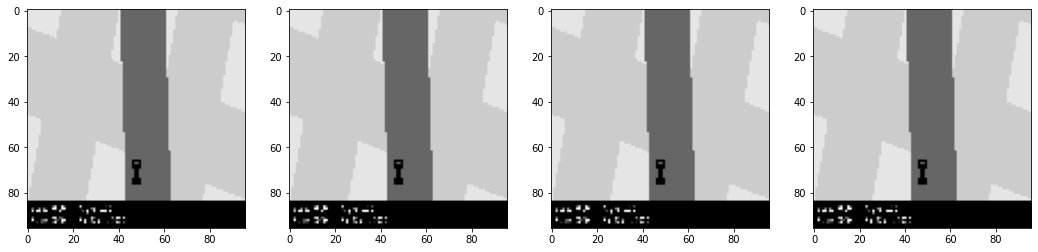

In [21]:
from matplotlib import pyplot as plt
plt.subplots(1,4,figsize=(18,15))
plt.subplot(141)
plt.imshow(obs[0,:,:,0], cmap='gray')
plt.subplot(142)
plt.imshow(obs[0,:,:,1], cmap='gray')
plt.subplot(143)
plt.imshow(obs[0,:,:,2], cmap='gray')
plt.subplot(144)
plt.imshow(obs[0,:,:,3], cmap='gray')


In [22]:
print(reward, done, pasos)
print(info)

[-100.1] [ True] 75
[{'terminal_observation': array([[[229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        ...,
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.]],

       [[229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        ...,
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.]],

       [[229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        [229., 229., 229., 229., 229., 229.],
        ...,
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.],
        [204., 204., 204., 204., 204., 204.]],

       ...,

       [[  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  

In [23]:
print(action, _states)

[4] None
